In [1]:
import cv2
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
l2r_smirk = '../datasets/smirk/N09pgUrFChEH8GM6APzJ0/cam000006.png'
l2r_smirk_anno = '../datasets/smirk/N09pgUrFChEH8GM6APzJ0/cam000006.labels.png'
r2l_smirk = '../datasets/smirk/aITx4TyRncKnardhTgCzz/cam000006.png'
r2l_smirk_anno = '../datasets/smirk/aITx4TyRncKnardhTgCzz/cam000006.labels.png'

In [52]:
l2r_bgr = cv2.imread(l2r_smirk)
l2r_anno_gray = cv2.imread(l2r_smirk_anno, cv2.IMREAD_GRAYSCALE)
ret, l2r_anno_binary = cv2.threshold(l2r_anno_gray, 0, 255, cv2.THRESH_BINARY)

l2r_mask_binary = l2r_anno_binary == 255
l2r_white_bg_mask = np.bitwise_not(np.zeros_like(l2r_bgr))
l2r_white_bg_mask[l2r_mask_binary] = l2r_bgr[l2r_mask_binary]

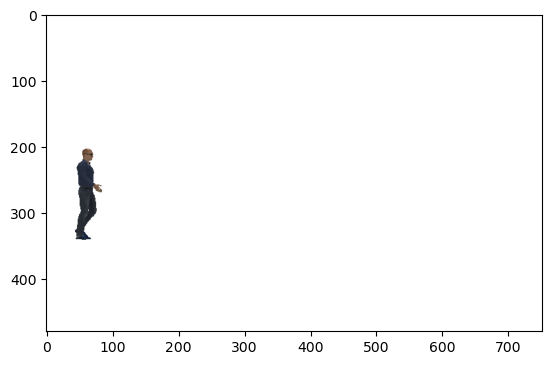

In [53]:
plt.imshow(cv2.cvtColor(l2r_white_bg_mask, cv2.COLOR_BGR2RGB))

In [56]:
pt = np.argwhere(l2r_anno_binary == 255)
min_y, min_x = np.min(pt[:],axis=0)  
max_y, max_x = np.max(pt[:],axis=0)   
height = max_y - min_y  
width = max_x - min_x
l2r_ped_bbox_bgr = l2r_white_bg_mask[min_y:max_y, min_x:max_x, :]

True

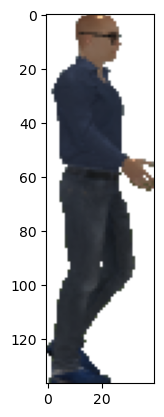

In [64]:
plt.imshow(cv2.cvtColor(l2r_ped_bbox_bgr, cv2.COLOR_BGR2RGB))
cv2.imwrite('l2r_ped_blob.png', l2r_ped_bbox_bgr)

In [14]:
r2l_bgr = cv2.imread(r2l_smirk)
r2l_anno_gray = cv2.imread(r2l_smirk_anno, cv2.IMREAD_GRAYSCALE)
ret, r2l_anno_binary = cv2.threshold(r2l_anno_gray, 0, 255, cv2.THRESH_BINARY)

r2l_mask_binary = r2l_anno_binary == 255
r2l_black_bg_mask = np.zeros_like(r2l_bgr)
r2l_black_bg_mask[r2l_mask_binary] = r2l_bgr[r2l_mask_binary]

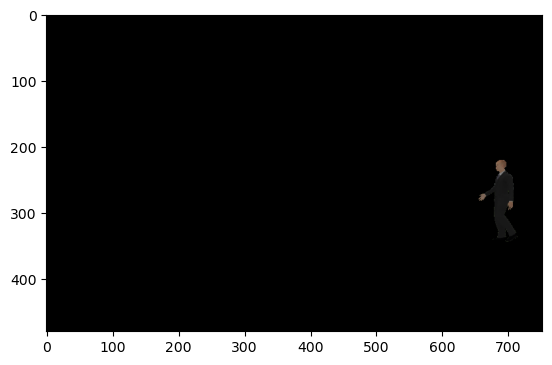

In [15]:
plt.imshow(cv2.cvtColor(r2l_black_bg_mask, cv2.COLOR_BGR2RGB))

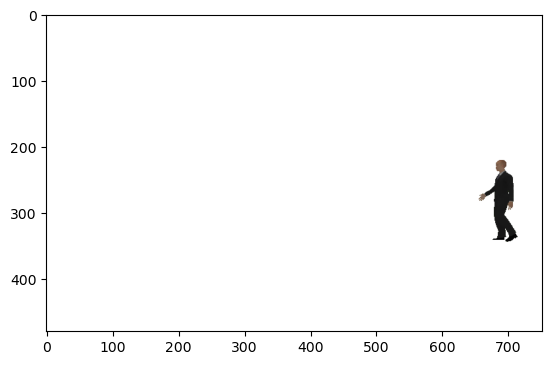

In [60]:
r2l_bgr = cv2.imread(r2l_smirk)
r2l_anno_gray = cv2.imread(r2l_smirk_anno, cv2.IMREAD_GRAYSCALE)
ret, r2l_anno_binary = cv2.threshold(r2l_anno_gray, 0, 255, cv2.THRESH_BINARY)

r2l_mask_binary = r2l_anno_binary == 255
r2l_white_bg_mask = np.bitwise_not(np.zeros_like(r2l_bgr))
r2l_white_bg_mask[r2l_mask_binary] = r2l_bgr[r2l_mask_binary]
plt.imshow(cv2.cvtColor(r2l_white_bg_mask, cv2.COLOR_BGR2RGB))

In [61]:
pt = np.argwhere(r2l_anno_binary == 255)
min_y, min_x = np.min(pt[:],axis=0)  
max_y, max_x = np.max(pt[:],axis=0)   
height = max_y - min_y  
width = max_x - min_x
r2l_ped_bbox_bgr = r2l_white_bg_mask[min_y:max_y, min_x:max_x, :]

True

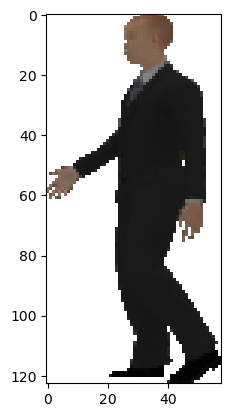

In [63]:
plt.imshow(cv2.cvtColor(r2l_ped_bbox_bgr, cv2.COLOR_BGR2RGB))
cv2.imwrite('r2l_ped_blob.png', r2l_ped_bbox_bgr)